In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

use the stats library to call the maxwell function

this generates a Maxwell continuous random variable

In [2]:
maxwell = stats.maxwell

Generate random numbers (which will be our dataset)

Use the parameter 'size' to set the number of data points. Here, we generate 10,000 dat points

In [10]:
data = maxwell.rvs(size=10000)

In [11]:
# check that the data contains 10,000 points

len(data)

10000

(array([ 332., 1255., 2201., 2327., 1871., 1135.,  547.,  225.,   89.,
          18.]),
 array([0.09725987, 0.50495471, 0.91264956, 1.3203444 , 1.72803925,
        2.1357341 , 2.54342894, 2.95112379, 3.35881863, 3.76651348,
        4.17420832]),
 <BarContainer object of 10 artists>)

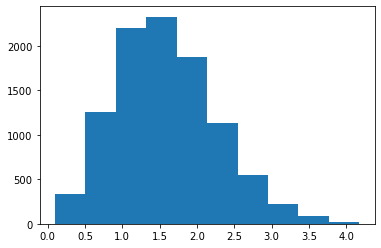

In [12]:
# make a histogram of the data, to check how it looks

plt.hist(data)

Now, use the maxwell function to fit the data. It provides estimates for generic data.

Use the option 'floc=0' when you fit the data. Without that, the fit method treats the location as one more free parameter to be included in the fit (which is not what we want).

In [16]:
params = maxwell.fit(data, floc=0)

# print the parameters for the fitted result

print(params)

(0, 0.9933598342012706)


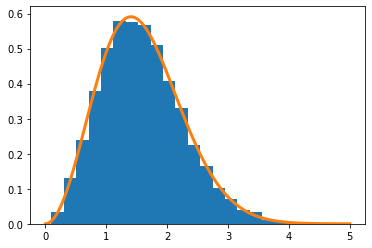

In [21]:
plt.hist(data, bins=20, density = True)
x = np.linspace(0, 5, 100)
plt.plot(x, maxwell.pdf(x, *params), lw=3)
plt.show()

## References:
1. [python scipy maxwell function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.maxwell.html#scipy.stats.maxwell)